In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

from config import DATA, DATA_2, LAYERS_SIZE, LAYERS_SIZE_2, DEFAULT_DEPTH, NUMBER_OF_GAMES
from torch.utils.data import Dataset, DataLoader
from player import RandomPlayer, MiniMaxPlayer, MiniMaxPlayerWithHFunction
from torch.nn.functional import l1_loss
from mlp import FlexibleMLP
from display import GameVisualize

/Users/ntd432/Desktop/SE4GD/UnivAQ/AI/code/ai-univaq/minimax/chess_game.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load("model.pth

In [3]:
class CSVDataset(Dataset):
    def __init__(self, file_path):
        # Load the data
        data = pd.read_csv(file_path)
        
        # Separate features and target
        self.X = data.iloc[:, :-1].values  # All columns except the last one
        self.y = data.iloc[:, -1].values  # The last column
        
        # Convert to tensors
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

## **Task 3**

### Generate train data with H0 and HL (L = 3)

In [ ]:
game = GameVisualize()
player_1 = RandomPlayer(True)
player_2 = MiniMaxPlayer(False, depth=4, generate_data=True)
x = []
for i in range(NUMBER_OF_GAMES):
    result = game.start_game(player_1, player_2, visual=False, pause=1e-15)

Added row: 0.9616519605635712, 0.9991010225852965
Added row: 0.9383809099487179, 0.999144627340525
Added row: 0.9252231663939197, 0.9934461295695164
Added row: 0.8724430134167889, 0.9883581441758209
Added row: 0.866020726944579, 0.9975016102916053
Added row: 0.835094769994325, 0.9982082425848845
Added row: 0.8339277875296185, 0.9836980424542952
Added row: 0.7742963015426141, 0.9996027621352966
Added row: 0.7090657205593837, 0.9983754538734605
Added row: 0.5567104924534714, 0.9995386174093719
Added row: 0.5458866556058983, 0.9998603521582361
Added row: 0.5225799750145965, 0.9986666629764701
Added row: 0.4242255769455626, 0.997233302840705
Added row: 0.4152662552432975, 0.9988249743766504
Added row: 0.34898966449867086, 0.9969620958987474
Added row: 0.208577425166401, 0.9977006899658497
Added row: 0.1807386200471015, 0.9987854065275931
Added row: 0.1278253210178626, 1.9432773045584322
Added row: 0.0891997283633027, 0.9997196454729111
Added row: 0.7836345616595414, 0.9972341964821233
Adde

In [4]:
dataset = CSVDataset(DATA)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create DataLoaders for batching
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [5]:
model = FlexibleMLP(LAYERS_SIZE)
print(model)

# Define the loss function and optimizer
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

FlexibleMLP(
  (model): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): Softmax(dim=1)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): Softmax(dim=1)
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): Softmax(dim=1)
    (6): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [6]:
# Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print epoch loss
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

torch.save(model.state_dict(), "model.pth")

/Users/ntd432/Desktop/SE4GD/UnivAQ/AI/code/ai-univaq/.venv/lib/python3.9/site-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 1/1000, Loss: 29.3237
Epoch 2/1000, Loss: 13.4258
Epoch 3/1000, Loss: 12.1111
Epoch 4/1000, Loss: 26.3637
Epoch 5/1000, Loss: 5.7035
Epoch 6/1000, Loss: 31.3458
Epoch 7/1000, Loss: 8.2659
Epoch 8/1000, Loss: 10.3101
Epoch 9/1000, Loss: 30.8258
Epoch 10/1000, Loss: 11.8087
Epoch 11/1000, Loss: 30.7046
Epoch 12/1000, Loss: 51.2760
Epoch 13/1000, Loss: 8.6087
Epoch 14/1000, Loss: 7.6329
Epoch 15/1000, Loss: 25.8351
Epoch 16/1000, Loss: 9.9821
Epoch 17/1000, Loss: 15.4514
Epoch 18/1000, Loss: 51.1175
Epoch 19/1000, Loss: 12.1134
Epoch 20/1000, Loss: 12.8508
Epoch 21/1000, Loss: 12.4790
Epoch 22/1000, Loss: 28.2275
Epoch 23/1000, Loss: 29.2983
Epoch 24/1000, Loss: 32.6908
Epoch 25/1000, Loss: 14.1523
Epoch 26/1000, Loss: 43.4352
Epoch 27/1000, Loss: 34.7562
Epoch 28/1000, Loss: 29.1236
Epoch 29/1000, Loss: 12.1411
Epoch 30/1000, Loss: 13.2060
Epoch 31/1000, Loss: 25.2014
Epoch 32/1000, Loss: 9.4822
Epoch 33/1000, Loss: 21.9155
Epoch 34/1000, Loss: 11.7389
Epoch 35/1000, Loss: 27.0202


In [7]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
l1 = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        outputs = outputs.squeeze(-1)
        # Accumulate L1
        l1 += l1_loss(outputs, batch_y, reduction='sum').item()
        total += batch_y.size(0)  # Count total samples

# Calculate Mean Absolute Error (average per sample)
l1_error = l1 / total

print(f"Mean Absolute Error Loss (L1) on test data: {l1_error}")

Mean Absolute Error Loss (L1) on test data: 22.44178054659697


## **Task 5**

### Generate train data with H0 = {hi} and HL

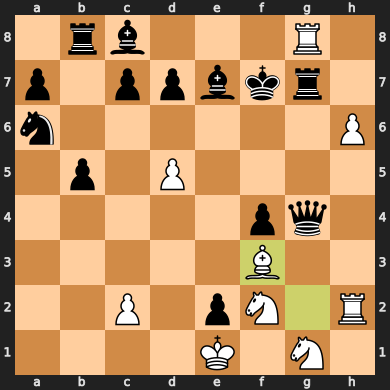

Added row: [17.33186592318836, 16.102396539955855, 16.800935030859346, 18.080569944974176, 26.29247984734407]
Added row: [16.346383906378964, 16.994770726258604, 14.245189916999363, 17.225263571961438, 100]
Added row: [15.728523148526158, 14.452848061303143, 13.472438036528672, 16.42273942898369, 29.51572596251326]
Added row: [15.236610523094317, 14.829918033363015, 12.710550811621628, 16.923229391356724, 29.457047375750566]
Added row: [12.409996155860618, 11.856559339523074, 12.42661649762687, 13.742503468242983, 17.712254704038003]
Added row: [12.9889481594928, 13.015573784526989, 9.770101380739295, 13.663792447411723, 26.510926270111753]
Added row: [12.838871341008087, 12.751007813432267, 9.493137402420636, 13.33107117316597, 26.798830095949615]
Added row: [12.213828928767619, 12.92324210495114, 9.263113472198615, 13.937994510652281, 26.73669715865107]
Added row: [12.559349179790395, 11.576763283458426, 10.303974841095036, 13.862861143111303, 21.454179307088985]


In [ ]:
game = GameVisualize()
player_1 = RandomPlayer(True)
player_2 = MiniMaxPlayerWithHFunction(False, depth=DEFAULT_DEPTH, generate_data=True)
x = []
for i in range(10):
    result = game.start_game(player_1, player_2, visual=True, pause=1e-15)

In [4]:
dataset = CSVDataset(DATA_2)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create DataLoaders for batching
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [5]:
model = FlexibleMLP(LAYERS_SIZE_2)
print(model)

# Define the loss function and optimizer
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

FlexibleMLP(
  (model): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): Softmax(dim=1)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): Softmax(dim=1)
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): Softmax(dim=1)
    (6): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [6]:
# Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print epoch loss
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

torch.save(model.state_dict(), "model_2.pth")

/Users/ntd432/Desktop/SE4GD/UnivAQ/AI/code/ai-univaq/.venv/lib/python3.9/site-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/Users/ntd432/Desktop/SE4GD/UnivAQ/AI/code/ai-univaq/.venv/lib/python3.9/site-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 1/1000, Loss: 54.5441
Epoch 2/1000, Loss: 50.6802
Epoch 3/1000, Loss: 29.8467
Epoch 4/1000, Loss: 29.5418
Epoch 5/1000, Loss: 8.3579
Epoch 6/1000, Loss: 32.4955
Epoch 7/1000, Loss: 34.3011
Epoch 8/1000, Loss: 11.2205
Epoch 9/1000, Loss: 54.8510
Epoch 10/1000, Loss: 28.6398
Epoch 11/1000, Loss: 51.2537
Epoch 12/1000, Loss: 56.4522
Epoch 13/1000, Loss: 55.8315
Epoch 14/1000, Loss: 14.0500
Epoch 15/1000, Loss: 29.2755
Epoch 16/1000, Loss: 36.6488
Epoch 17/1000, Loss: 51.1329
Epoch 18/1000, Loss: 29.5646
Epoch 19/1000, Loss: 7.6357
Epoch 20/1000, Loss: 27.4960
Epoch 21/1000, Loss: 30.3392
Epoch 22/1000, Loss: 2.4390
Epoch 23/1000, Loss: 50.0041
Epoch 24/1000, Loss: 34.7376
Epoch 25/1000, Loss: 26.6838
Epoch 26/1000, Loss: 49.9977
Epoch 27/1000, Loss: 7.7356
Epoch 28/1000, Loss: 3.2064
Epoch 29/1000, Loss: 30.0850
Epoch 30/1000, Loss: 50.7292
Epoch 31/1000, Loss: 4.8296
Epoch 32/1000, Loss: 50.7854
Epoch 33/1000, Loss: 31.6958
Epoch 34/1000, Loss: 51.8902
Epoch 35/1000, Loss: 11.6475


In [7]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
l1 = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        outputs = outputs.squeeze(-1)
        # Accumulate L1
        l1 += l1_loss(outputs, batch_y, reduction='sum').item()
        total += batch_y.size(0)  # Count total samples

# Calculate Mean Absolute Error (average per sample)
l1_error = l1 / total

print(f"Mean Absolute Error Loss (L1) on test data: {l1_error}")

Mean Absolute Error Loss (L1) on test data: 34.54495518438157
